# DISEASE PREDICTION USING ML TECHNIQUES (Random Forest, Xgboost, Logistics Regression and Naive Bayes Classifier models) CASE STUDY OF  Classification of SARS-CoV-2

### Introduction
Pneumonia caused by SARS-CoV-2 emerged in Wuhan, China in December 2019 and was officially named COVID-19 by the WHO on Feb 11, 2020. The disease presents with a range of symptoms, including fever, dry cough, and fatigue, and is highly contagious through respiratory droplets and direct contact. The Chinese government and scientific community have taken rapid action to identify and contain the epidemic. Machine learning algorithms are being used to diagnose and manage the spread of the virus, which is the focus of this paper. Research has provided critical information on the biology and pathogenesis of SARS-CoV-2, as well as epidemiology, clinical features, diagnosis, management, and drug and vaccine development.

### Data Description
The data set used for this machine learning process was source from [Kaggle covid-19 dataset](https://www.kaggle.com/datasets/mykeysid10/covid19-dataset-for-year-2020). However, the original source is found at [Israel Govt databases](https://data.gov.il/dataset/covid-19/resource/d337959a-020a-4ed3-84f7-fca182292308). 

The data set contained 5861480 rows and 10 columns. Columns in the set are:

test_date,cough,fever, sore_throat, shortness_of_breath, head_ache, corona_result, age_60_and_above, gender and test_indication. For this work, we shall be using all columns having symptoms and the the test_indication.

**IMPORATION OF NEEDED LIBRARIES**

In [42]:
#!pip install xgboost
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#INSTAL FLASK TO SERVE THE FRONT END
!pip install Flask

# Note: This process can also be spread out at several stages of the machine learning building and actually a few library 
# importations were done during the work
mpl.rcParams['agg.path.chunksize'] = 1000


**Assigning the downloaded covid data set to the variable 'df' (dataframe)**

In [2]:
df=pd.read_csv("covid_data_2020-2021.csv")

**Confirming the contentensts of 'df'**

In [3]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,Negative,No,female,Other
5861476,2020-03-20,0,0,0,0,0,Negative,No,male,Other
5861477,2020-03-20,0,0,0,0,0,Negative,No,female,Other
5861478,2020-03-20,0,0,0,0,0,Negative,No,male,Other


**Reassigning integers (0 and 1) inplace of the 'Negative' and 'Positive' Strings in the corona_result coloumn 
to allow for analysis**


In [4]:
df['corona_result'] = df['corona_result'].replace({'Negative': 0, 'Positive': 1})

**Confirmation of the data set call up**

In [5]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,0,Yes,female,Other
1,2021-10-11,0,0,0,0,0,0,Yes,male,Other
2,2021-10-11,0,0,0,0,0,0,No,female,Other
3,2021-10-11,0,0,0,0,0,0,Yes,female,Other
4,2021-10-11,0,0,0,0,0,0,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,0,No,female,Other
5861476,2020-03-20,0,0,0,0,0,0,No,male,Other
5861477,2020-03-20,0,0,0,0,0,0,No,female,Other
5861478,2020-03-20,0,0,0,0,0,0,No,male,Other


**Checking of dataset properties**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        int64 
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(6), object(4)
memory usage: 447.2+ MB


**Checking integrity of the dataset**

In [7]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [8]:
# Dataset is clean and need no further cleaning

**Getting the correlation matrix of the dataset**

<AxesSubplot:>

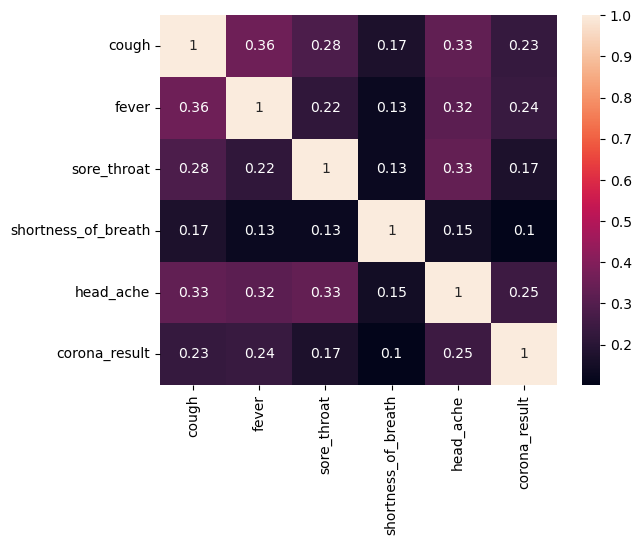

In [9]:
cor = df.corr()

sns.heatmap(cor, annot = True)


**Observation**

Most of the variables are highly correlative with the target variable

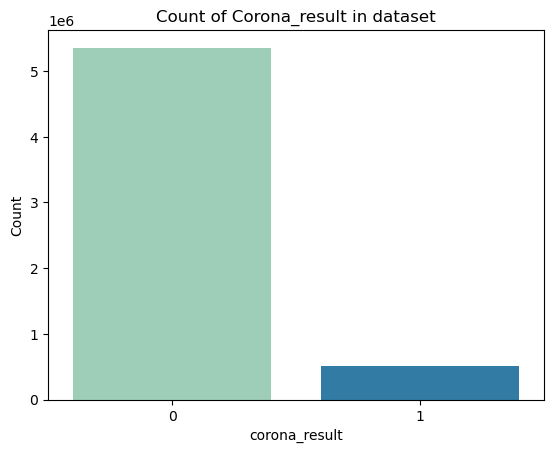

In [10]:
sns.countplot(data = df, x = 'corona_result', palette = 'YlGnBu')
plt.ylabel('Count')
plt.title('Count of Corona_result in dataset')
plt.show()

Observation:

There is an overrepresentation of negative cases over positive cases. This can lead to false negatives which would be a costly inefficiency of any model applied to this dataset. Undersampling will be applied!

**Creating subplots to visualize the effect of diferent symptoms on test result**

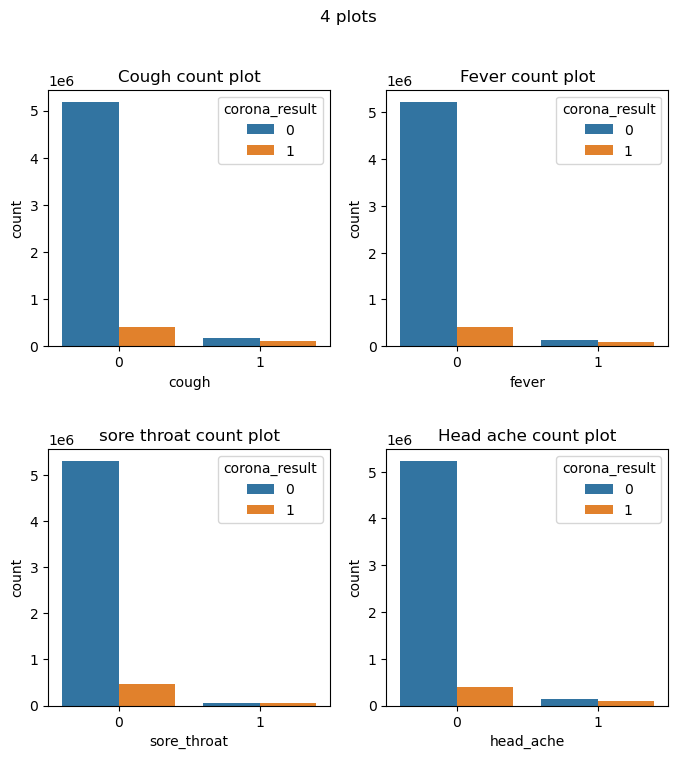

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (8, 8))

# Set plots for all axes
ax[0, 0].set_title('Cough count plot')
sns.countplot(data = df, x = 'cough', hue = 'corona_result', ax = ax[0, 0] )

ax[0, 1].set_title('Fever count plot')
sns.countplot(data = df, x = 'fever', hue = 'corona_result', ax = ax[0, 1] )

ax[1, 0].set_title('sore throat count plot')
sns.countplot(data = df, x = 'sore_throat', hue = 'corona_result', ax = ax[1, 0] )

ax[1, 1].set_title('Head ache count plot')
sns.countplot(data = df, x = 'head_ache', hue = 'corona_result', ax = ax[1, 1] )
fig.suptitle('4 plots')

# Adjust the spacing of the subplots vertically
fig.subplots_adjust(hspace = .4)

plt.show()

**General observation**
- Majority of cases are negative
- From sore throat case, the positive to negative ratio was higher than other symptoms, showing that soar throat was and important indicator of the infection

In [12]:
df['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [13]:
# sns.pairplot(data = df)

## **Data Preparation**

**Assigning the 'y' variable to the column 'corona_result'**

In [14]:
#Target Feature
y=df['corona_result']

**Confirmation of outcome**

In [15]:
y

0          0
1          0
2          0
3          0
4          0
          ..
5861475    0
5861476    0
5861477    0
5861478    0
5861479    0
Name: corona_result, Length: 5861480, dtype: int64

**We will be dropping columns that won't be needed for the machine learning model and which wont impact our outcome
Columns to be dropped: 'test_date','corona_result (already the y variable)','age_60_and_above','gender' and'test_indication'**


In [16]:
#Independent Feature
x=df.drop(['test_date','corona_result','age_60_and_above','gender','test_indication'], axis=1)

**Confirmation of Outcome**

In [17]:
x

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
5861475,1,1,0,0,0
5861476,0,0,0,0,0
5861477,0,0,0,0,0
5861478,0,0,0,0,0


**Checking the disparity in negaive and positive values in our target variabe**

In [18]:
df['corona_result'].value_counts()

0    5355807
1     505673
Name: corona_result, dtype: int64

Observation: There is an excessive volume of negative results over positive. This will affect our trainiig model as model will tilt or by biased twards negative results. Under or over sampling will be implimented

In [19]:
#!pip install imblearn

from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

In [20]:
# Undersampling of the class with the majority count
undersample = RandomUnderSampler(sampling_strategy = {0: 500000, 1: 500000}, random_state = 33)
x_under, y_under = undersample.fit_resample(x, y )

In [21]:
y_under.value_counts()

0    500000
1    500000
Name: corona_result, dtype: int64

In [22]:
#Setting  Train:Test Ratio as 80:20

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=42)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('\n\n')
print (y_train.value_counts())
print('\n\n')
print (y_test.value_counts())

(800000, 5) (200000, 5) (800000,) (200000,)

0    400013
1    399987
Name: corona_result, dtype: int64

1    100013
0     99987
Name: corona_result, dtype: int64


**Confirming the Outcome (Training Data)**

In [23]:
x_train

,cough,fever,sore_throat,shortness_of_breath,head_ache
566853,0,0,0,0,0
382311,0,0,0,0,0
241519,0,0,0,0,1
719220,0,0,0,0,0
905718,0,0,1,0,0
...,...,...,...,...,...
259178,0,0,0,0,0
365838,0,0,0,0,0
131932,0,0,0,0,0
671155,0,0,0,0,0


**Confirming the Outcome (test Data)**

In [24]:
x_test

,cough,fever,sore_throat,shortness_of_breath,head_ache
987231,0,0,0,0,0
79954,0,0,0,0,0
567130,1,0,1,0,1
500891,0,0,0,0,0
55399,0,0,0,0,0
...,...,...,...,...,...
90245,0,0,0,0,0
639296,0,1,0,0,0
311939,0,0,0,0,0
324459,1,0,0,0,1


**USING RANDOM FOREST CLASSIFIER MODEL**

In [25]:
# Initializing the random forest classifier 
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


In [26]:
# Fitting the model to the training data
rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [27]:
# Making predictions on the testing data
y_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

print('Random forest Classifer\n--------------------')
print(f'Accuracy: {round(accuracy1 * 100, 2)}')
print(f'Precision: {round(precision1 * 100, 2)}')
print(f'Recall: {round(recall1 * 100, 2)}')
print(f'f1_score: {round(f1_score1 * 10, 2)}')

Random forest Classifer
--------------------
Accuracy: 68.36
Precision: 87.82
Recall: 42.64
f1_score: 5.74


**Plotting the confusion matrix for Random Forest**

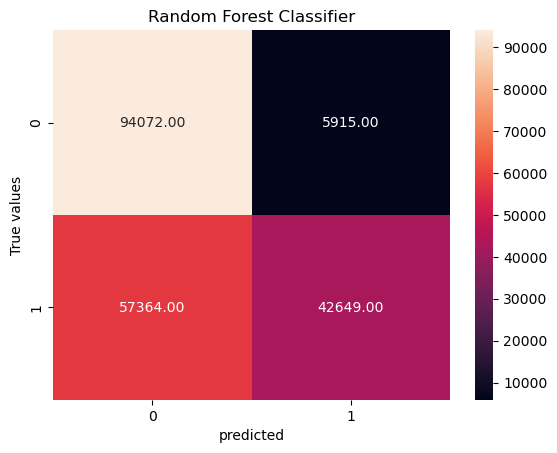

In [28]:
#Plot confusion matrix for Random Forest Classifier
matx = confusion_matrix(y_test, y_pred)
sns.heatmap(matx, annot = True, fmt = '.2f')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Random Forest Classifier')
plt.show()

**Observation**
- A lot of positive cases were predicted as negative

Hyper Parameter Tunning 

In [29]:
# from sklearn.model_selection import GridSearchCV

# model_grid_params = {
#     'n_estimators': list(range(90, 110)),
#     'max_depth': list(range(1, 10)),
#     'random_state': list(range(40,60))
# }

# grid_search = GridSearchCV(rfc, model_grid_params, cv = 5)
# grid_search.fit(x_train, y_train)

# # Output griod search result
# grid_search.best_params_

**Using the XGBoot Model**

In [30]:
# Create an XGBoost DMatrix for the training data

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [31]:
#Defining the hyperparameters for the XGBoost model

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3}

#Training the Model
model = xgb.train(params, dtrain, num_boost_round=10)

In [32]:
# Making predictions on the testing set

xgy_pred = model.predict(dtest)
accuracy2 = accuracy_score(y_test, xgy_pred)

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, xgy_pred)
precision2 = precision_score(y_test, xgy_pred)
recall2 = recall_score(y_test, xgy_pred)
f1_score2 = f1_score(y_test, xgy_pred)

print('XG Boost Classifier\n--------------------')
print(f'Accuracy: {round(accuracy2 * 100, 2)}')
print(f'Precision: {round(precision2 * 100, 2)}')
print(f'Recall: {round(recall2 * 100, 2)}')
print(f'f1_score: {round(f1_score2 * 10, 2)}')



XG Boost Classifier
--------------------
Accuracy: 68.15
Precision: 87.78
Recall: 42.17
f1_score: 5.7


**Plotting confusion matrix for XGBoost**

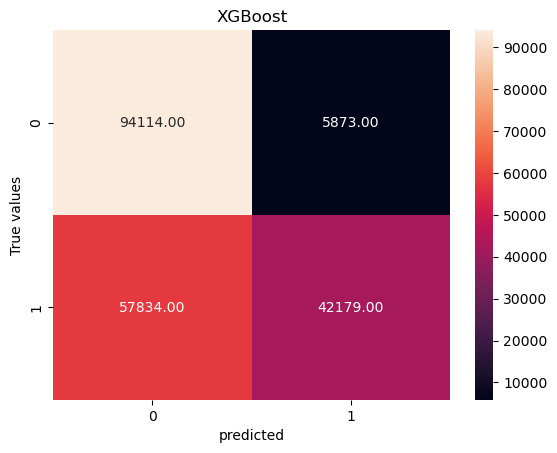

In [33]:
matx = confusion_matrix(y_test, xgy_pred)
sns.heatmap(matx, annot = True, fmt = '.2f')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('XGBoost')
plt.show()

**A lot of positive cases were predicted as negative**

**LOGISTIC REGRESSION MODE;**

In [34]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
lry_pred=logreg.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, lry_pred)
precision3 = precision_score(y_test, lry_pred)
recall3 = recall_score(y_test, lry_pred)
f1_score3 = f1_score(y_test, lry_pred)

print('Logistics Regression Classifer\n--------------------')
print(f'Accuracy: {round(accuracy3 * 100, 2)}')
print(f'Precision: {round(precision3 * 100, 2)}')
print(f'Recall: {round(recall3 * 100, 2)}')
print(f'f1_score: {round(f1_score3 * 10, 2)}')

Logistics Regression Classifer
--------------------
Accuracy: 68.36
Precision: 87.82
Recall: 42.64
f1_score: 5.74


**Ploting confusion matrix for Logistic Regression**

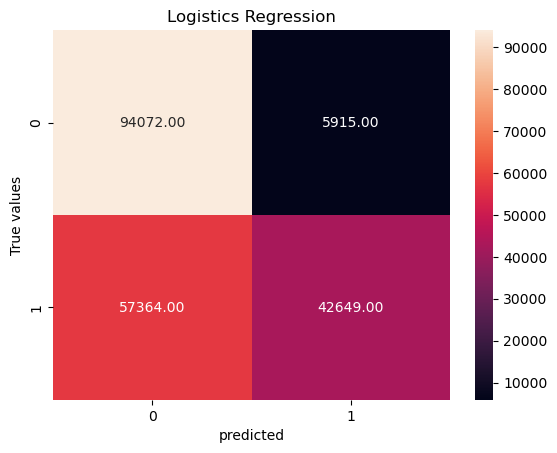

In [36]:
matx = confusion_matrix(y_test, lry_pred)
sns.heatmap(matx, annot = True, fmt = '.2f')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Logistics Regression')
plt.show()

Observation

- This model preidcted more positive cases correctly as compared to the XG Boost Model

**Naive Bayes classifier Model**


In [37]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(x_train, y_train)

# Make predictions on the testing data
gnb_y_pred = gnb.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, gnb_y_pred)
precision4 = precision_score(y_test, gnb_y_pred)
recall4 = recall_score(y_test, gnb_y_pred)
f1_score4 = f1_score(y_test, gnb_y_pred)

print('Logistics Regression Classifer\n--------------------')
print(f'Accuracy: {round(accuracy4 * 100, 2)}')
print(f'Precision: {round(precision4 * 100, 2)}')
print(f'Recall: {round(recall4 * 100, 2)}')
print(f'f1_score: {round(f1_score4 * 10, 2)}')


Logistics Regression Classifer
--------------------
Accuracy: 68.36
Precision: 87.82
Recall: 42.64
f1_score: 5.74


**Plotting confusion matrix for Naive Bayes**

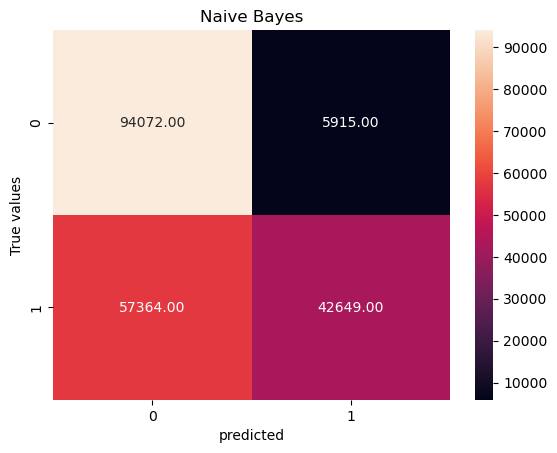

In [38]:
matx = confusion_matrix(y_test, gnb_y_pred)
sns.heatmap(matx, annot = True, fmt = '.2f')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Naive Bayes')
plt.show()

**Observation**
- This model predicted more positive cases correctly as compared to the XG Boost Model
- This model predicted more positive cases wrongly than it did for correctly predicting positive cases.

In [39]:
# Print all accuracies...
models = ['Random Forest Model', 'XGBoost Model', 'Logistics Regression Model', 'Naive Bayes Model']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]
recalls = [recall1, recall2, recall3, recall4]
precisions = [precision1, precision2, precision3, precision4]
f1_scores = [f1_score1, f1_score2, f1_score3, f1_score4]

for i in range(0, 4):
    print(f'{models[i]} Metrics:\n----------------------')
    print(f'Accuracy: {round(accuracies[i] * 100, 2)}%')
    print(f'Recall: {round(recalls[i] * 100, 2)}%')
    print(f'Precision: {round(precisions[i] * 100, 2)}%')
    print(f'F1 score: {round(f1_scores[i] * 100, 2)}%\n\n')

Random Forest Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%


XGBoost Model Metrics:
----------------------
Accuracy: 68.15%
Recall: 42.17%
Precision: 87.78%
F1 score: 56.97%


Logistics Regression Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%


Naive Bayes Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%




**Limitation and Challenges**

A major challenge during the course of this research was computing resources. An attempt to get better tuned results using Hyperparameter Tuning proved abortive after 12 hours of processing with an intel core i7 processor with an 8gig RAM. Similar limitations were also observed with attempt on school computers. This demand for resource also hindered the use of certain models that needed high computing power. An example is Support Vector Machine (SVM).

**CONCLUSION**

Based on the above results ,  the four machine learning models (Random Forest, XGBoost, Logistics Regression, and Naive Bayes have relatively similar accuracy metrics. However, there are slight variations in recall, precision, and F1 score metrics.
While this may seem like a relatively low accuracy, it is important to note that the performance of each algorithm may vary depending on the specific dataset, pre-processing pipeline and problem being tackled. Therefore, it is recommended to carefully consider the strengths and weaknesses of each algorithm, decide on what metric trade-offs best suit the usecase of the model and choose the most appropriate one based on the specific requirements of the task. Additionally, future research could explore techniques to improve the accuracy of these algorithms or consider alternative approaches altogether






**RECOMMENDATION**


To improve the performance of these models, the following approaches can be considered:

**Feature Engineering:**

Feature engineering involves selecting and transforming relevant features that can improve model performance. This would involve analyzing the relationship between features and the target variable, creating new features, and selecting the most important features that can help the model make better predictions.

**Hyperparameter Tuning:**

Each of the machine learning models used in the paper has various hyperparameters that can be tuned to improve performance. By using techniques like grid search or random search, we can systematically explore different hyperparameter combinations to find the best set of hyperparameters that optimize model performance.

**Ensemble Learning:**
Ensemble learning will involve combining the predictions of multiple machine learning models to improve overall performance. Techniques like bagging, boosting, and stacking can be used to create ensembles that can outperform individual models.

By implementing these approaches, we may be able to improve the performance of the machine learning models and achieve higher accuracy, recall, precision, and F1 score metrics.


In [43]:
# Save the model (for later use)
import joblib
joblib.dump(model, 'covid_symptom_model.pkl')

['covid_symptom_model.pkl']